## 생존여부 예측모델 만들기
### 학습용 데이터 (X_train, y_train)을 이용하여 생존 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 accuracy 평가지표에 따라 채점)

(가) 제공 데이터 목록
- y_train: 생존여부(학습용)
- X_trian, X_test : 승객 정보 (학습용 및 평가용)

(나) 데이터 형식 및 내용
- y_trian (712명 데이터)

**시험환경 세팅은 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임**

### 유의사항
- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 accuracy로 평가함

csv 출력형태

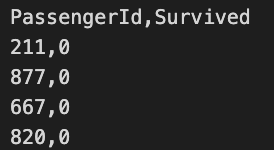

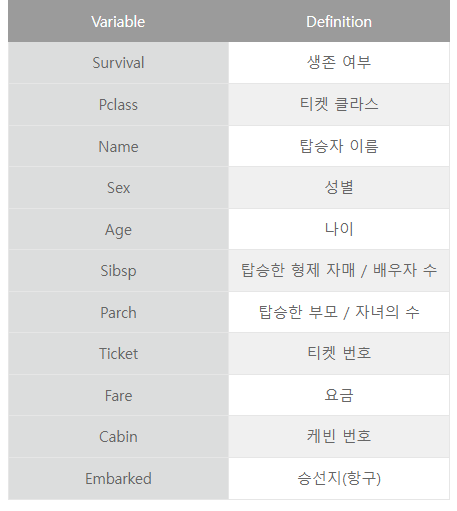

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)

    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])


    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/3%EC%9D%BC%EC%B0%A8/Titanic.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [ ]:
import pandas as pd
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 11), (712, 2), (179, 11), (179, 2))

### EDA

In [ ]:
X_train.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 90 to 116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Gender       712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        170 non-null    object 
 10  Embarked     711 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [ ]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,446.910112,2.285112,29.414783,0.533708,0.391854,33.388155
std,257.882594,0.842875,14.589601,1.099284,0.802311,50.807818
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.750000,1.000000,20.000000,0.000000,0.000000,7.925000
50%,444.000000,3.000000,28.000000,0.000000,0.000000,15.047900
75%,672.250000,3.000000,37.000000,1.000000,0.000000,31.387500
max,891.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [ ]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Gender           0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          542
Embarked         1
dtype: int64

In [ ]:
#생존비율? ->y_train
y_train['Survived'].value_counts()

0    441
1    271
Name: Survived, dtype: int64

#### 데이터 전처리

In [ ]:
y = y_train['Survived']

#sex만 원핫인코딩
features = ['Pclass','Gender','SibSp','Parch']
X = pd.get_dummies(X_train[features])
test = pd.get_dummies(X_test[features])

In [ ]:
x.shape,test.shape

((712, 5), (179, 5))

In [ ]:
test

,Pclass,SibSp,Parch
210,3,0,0
876,3,0,0
666,2,0,0
819,3,3,2
736,3,1,3
...,...,...,...
494,3,0,0
871,1,1,1
530,2,1,1
157,3,0,0


### 모델 및 평가

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,max_depth=7, random_state=2023)
#n_stimators : 나무 갯수=200, max_depth = 나무의 깊이, random_state -> 재현가능성
model.fit(X,y)
predictions = model.predict(test)

In [ ]:
model.score(X,y) #모의고사

0.8356741573033708

In [ ]:
output = pd.DataFrame({'PassengerId':X_test.PassengerId, 'Survived':predictions})
output

,PassengerId,Survived
210,211,0
876,877,0
666,667,0
819,820,0
736,737,0
...,...,...
494,495,0
871,872,1
530,531,1
157,158,0


In [ ]:
#수험번호.csv로 출력
output.to_csv('1234567.csv',index=False)

In [ ]:
#결과를 채점(우리가 알수 없음.)
model.score(test, y_test['Survived'])

0.7262569832402235

### 데이터 읽기+전처리

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)

    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])


    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/3%EC%9D%BC%EC%B0%A8/Titanic.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Survived', id_name='PassengerId')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712, 2), (179, 2))

In [ ]:
data_list = [X_train,X_test]

for data in data_list:
    data['Gender'] = data['Gender'].map({'female':1,'male':0}).astype(int)
X_train

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",0,29.0,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",0,33.0,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",1,39.0,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",1,31.0,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",0,19.0,0,0,28424,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
621,622,1,"Kimball, Mr. Edwin Nelson Jr",0,42.0,1,0,11753,52.5542,D19,S
128,129,3,"Peter, Miss. Anna",1,NaN,1,1,2668,22.3583,F E69,C
57,58,3,"Novel, Mr. Mansouer",0,28.5,0,0,2697,7.2292,NaN,C
341,342,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
sex_mean = X_train.groupby('Gender')['Age'].mean()
sex_mean

Gender
0    30.428571
1    27.665877
Name: Age, dtype: float64

In [ ]:
for data in data_list:
    data.loc[(data['Gender']==0) & (data['Age'].isnull()),'Age'] = sex_mean[0]
    data.loc[(data['Gender']==1) & (data['Age'].isnull()),'Age'] = sex_mean[1]
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          542
Embarked         1
dtype: int64

In [ ]:
X_train

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
90,91,3,"Christmann, Mr. Emil",0,29.000000,0,0,343276,8.0500,NaN,S
103,104,3,"Johansson, Mr. Gustaf Joel",0,33.000000,0,0,7540,8.6542,NaN,S
577,578,1,"Silvey, Mrs. William Baird (Alice Munger)",1,39.000000,1,0,13507,55.9000,E44,S
215,216,1,"Newell, Miss. Madeleine",1,31.000000,1,0,35273,113.2750,D36,C
191,192,2,"Carbines, Mr. William",0,19.000000,0,0,28424,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
621,622,1,"Kimball, Mr. Edwin Nelson Jr",0,42.000000,1,0,11753,52.5542,D19,S
128,129,3,"Peter, Miss. Anna",1,27.665877,1,1,2668,22.3583,F E69,C
57,58,3,"Novel, Mr. Mansouer",0,28.500000,0,0,2697,7.2292,NaN,C
341,342,1,"Fortune, Miss. Alice Elizabeth",1,24.000000,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
X_test

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,211,3,"Ali, Mr. Ahmed",0,24.000000,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
876,877,3,"Gustafsson, Mr. Alfred Ossian",0,20.000000,0,0,7534,9.8458,NaN,S
666,667,2,"Butler, Mr. Reginald Fenton",0,25.000000,0,0,234686,13.0000,NaN,S
819,820,3,"Skoog, Master. Karl Thorsten",0,10.000000,3,2,347088,27.9000,NaN,S
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",1,48.000000,1,3,W./C. 6608,34.3750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
494,495,3,"Stanley, Mr. Edward Roland",0,21.000000,0,0,A/4 45380,8.0500,NaN,S
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.000000,1,1,11751,52.5542,D35,S
530,531,2,"Quick, Miss. Phyllis May",1,2.000000,1,1,26360,26.0000,NaN,S
157,158,3,"Corn, Mr. Harry",0,30.000000,0,0,SOTON/OQ 392090,8.0500,NaN,S


In [ ]:
X_train = X_train.drop(['Name','Cabin'],axis=1)
X_test = X_test.drop(['Name','Cabin'],axis=1)

In [ ]:
X_train = X_train.drop(['Embarked'],axis=1)
X_test = X_test.drop(['Embarked'],axis=1)

In [ ]:
X_train

,PassengerId,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare
90,91,3,0,29.000000,0,0,343276,8.0500
103,104,3,0,33.000000,0,0,7540,8.6542
577,578,1,1,39.000000,1,0,13507,55.9000
215,216,1,1,31.000000,1,0,35273,113.2750
191,192,2,0,19.000000,0,0,28424,13.0000
...,...,...,...,...,...,...,...,...
621,622,1,0,42.000000,1,0,11753,52.5542
128,129,3,1,27.665877,1,1,2668,22.3583
57,58,3,0,28.500000,0,0,2697,7.2292
341,342,1,1,24.000000,3,2,19950,263.0000


In [ ]:
y_train

,PassengerId,Survived
90,91,0
103,104,0
577,578,1
215,216,1
191,192,0
...,...,...
621,622,1
128,129,1
57,58,0
341,342,1


In [ ]:
X_train = X_train.drop(['Ticket'],axis=1)
X_test = X_test.drop(['Ticket'],axis=1)

In [ ]:
y = y_train['Survived']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,max_depth=7, random_state=2023)
#n_stimators : 나무 갯수=200, max_depth = 나무의 깊이, random_state -> 재현가능성
model.fit(X_train,y)
predictions = model.predict(X_test)

In [ ]:
model.score(X_train,y) #모의고사

0.925561797752809

In [ ]:
#결과를 채점(우리가 알수 없음.)
model.score(X_test, y_test['Survived'])

0.776536312849162

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y)
predictions = model.predict(X_test)

In [ ]:
model.score(X_train,y) #모의고사

1.0

In [ ]:
#결과를 채점(우리가 알수 없음.)
model.score(X_test, y_test['Survived'])

0.7932960893854749

## 당뇨병 여부 판단

이상치 처리 (Glucose, BloodPressure, SkinThickness, Insulin, BMI가 0인 값)

## [참고]작업형2 문구
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

### 데이터 파일 읽기 예제
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

### 사용자 코딩

### 답안 제출 참고
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

# 성인 인구조사 소득 예측

- age: 나이
- workclass: 고용 형태
- fnlwgt: 사람의 대표성을 나타내는 가중치(final weight)
- education: 교육 수준
- education.num: 교육 수준 수치
- marital.status: 결혼 상태
- occupation: 업종
- relationship: 가족 관계
- race: 인종
- sex: 성별
- capital.gain: 양도 소득
- capital.loss: 양도 손실
- hours.per.week: 주당 근무 시간
- native.country: 국적
- income: 수익 (예측해야 하는 값)

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)

    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])


    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/adult.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 15), (6513, 15), (26048, 2), (6513, 2))

## 집 값 예측
예측할 변수 ['SalePrice']
평가: rmse, r2

rmse는 낮을 수록 좋은 성능
r2는 높을 수록 좋은 성능

In [ ]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name

    if null_name != "":
        df[df == null_name] = np.nan

    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test

df = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='SalePrice', id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168, 2), (292, 2))


## 공공 자전거 수요 예측(Bike Sharing Demand)

 - 데이터 소개
  - 날짜 및 시간, 기온, 습도, 풍속 등의 정보를 정보를
  
  기반으로 1시간 간격으로 자전거 대여 횟수를 기록한 데이터.
  - 기록 날짜는 2011년 1월 ~ 2012년 12월까지
  - 데이터에 자세한 정보는 소개된 캐글 사이트에서 확인 가능.


### Data Fields
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +  Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (Dependent Variable)

target: count컬럼

In [15]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/train_bike.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/test_bike.csv")

In [16]:
# 데이터 크기
train.shape, test.shape

((10886, 12), (6493, 9))

# 사이트 예시 문제

### 백화점 고객의 1년 간 구매 데이터를 활용해
- 데이터 전처리
- Feature Engineering
- 모델링 (분류 알고리즘 사용)
- 하이퍼파라미터 튜닝 (초매개변수 최적화)
- 모형 앙상블
- csv제출

### 유의사항
- 수험번호.csv 파일이 만들어지도록 코드를 제출함
- 제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점함

In [28]:
# 데이터 불러오기
X = pd.read_csv('https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/%EC%A0%9C2%EC%9C%A0%ED%98%95%20%EC%98%88%EC%8B%9C%EB%AC%B8%EC%A0%9C/X_train.csv', encoding="euc-kr")
y = pd.read_csv('https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/%EC%A0%9C2%EC%9C%A0%ED%98%95%20%EC%98%88%EC%8B%9C%EB%AC%B8%EC%A0%9C/y_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/%EC%A0%9C2%EC%9C%A0%ED%98%95%20%EC%98%88%EC%8B%9C%EB%AC%B8%EC%A0%9C/X_test.csv', encoding="euc-kr")

# 작업형 3유형

- p-value < 유의수준 0.05 : 귀무가설을 기각한다.(대립가설 채택)
- p-value >=유의수준 0.05 : 귀무가설을 채택한다.

`from scipy import stats`

### 1
표본평균 : after - before의 평균
귀무가설 : 표본평균 >=0
대립가설 : 표본평균 <0

검정통계량, p-value : `stats.ttest_rel(after 데이터, before 데이터, alternative='less')` // alternatvie : 대립가설 기준으로 크면 greater, 작으면 less, 같으면 X(또는 tow-sided)

### 2
A그룹, B그룹이 나뉘어져 있음.
귀무가설 : A그룹과 B그룹이 차이가 없다.
대립가설 : A그룹과 B그룹이 차이가 있다.

검정통계량.`p-value = stats.ttest_ind(A그룹 데이터, B그룹 데이터)`

### 3

귀무가설 : 모평균이 C와 같다.
대립가설 : 모평균이 C보다 크다

검정 통계량.p-value = stats.ttset_1samp(데이터,C, alternative ='greater')

### 4
A,B,C 그룹이 나뉘져 있음.
귀무가설 : A,B,C 그룹 간의 평균 차이가 없다.
대립가설 : A,B,C 그룹 간의 평균 차이가 있다.

검정통계량.p-value = stats.f_oneway(A그룹, B그룹, C그룹)

### 5
귀무가설 : 데이터는 정규분포를 따른다.
대립가설 : 데이터는 정규분포를 따르지 않는다.

검정통계량.`p-value = stats.shapiro(데이터)`



## 주어진 데이터는 고혈압 환자 치료 전후의 혈압이다. 해당 치료가 효과가 있는지 대응(쌍체)표본 t-검정을 진행하시오
- 귀무가설(H0): $\mu$ >= 0
- 대립가설(H1): $\mu$ < 0
- $\mu$ = (치료 후 혈압 - 치료 전 혈압)의 평균
- 유의수준: 0.05

1. $\mu$의 표본평균은?(소수 둘째자리까지 반올림)
2. 검정통계량 값은?(소수 넷째자리까지 반올림)
3. p-값은?(소수 넷째자리까지 반올림)
4. 가설검정의 결과는? (유의수준 5%)

In [ ]:
import pandas as pd
pd = pd.read_csv("https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/4%EC%9D%BC%EC%B0%A8/high_blood_pressure.csv")


## 어떤 특정 약물을 복용한 사람들의 평균 체온이 복용하지 않은 사람들의 평균 체온과 유의미하게 다른지 검정해보려고 합니다.

가정:
- 약물을 복용한 그룹과 복용하지 않은 그룹의 체온 데이터가 각각 주어져 있다고 가정합니다.
- 각 그룹의 체온은 정규분포를 따른다고 가정합니다.

## 검정통계량, p-value, 검정결과를 출력하시오

In [1]:
from scipy import stats

# 가설 설정
# H0: 약물을 복용한 그룹과 복용하지 않은 그룹의 평균 체온은 유의미한 차이가 없다.
# H1: 약물을 복용한 그룹과 복용하지 않은 그룹의 평균 체온은 유의미한 차이가 있다.

In [2]:
# 데이터 수집
group1 = [36.8, 36.7, 37.1, 36.9, 37.2, 36.8, 36.9, 37.1, 36.7, 37.1]
group2 = [36.5, 36.6, 36.3, 36.6, 36.9, 36.7, 36.7, 36.8, 36.5, 36.7]

# 가설검정
t_statistic, p_value = stats.ttest_ind(group1, group2)

print("검정통계량:", t_statistic)
print("p-value:", p_value)

# 유의성 검정
alpha = 0.05  # 유의수준 설정

if p_value < alpha:
    print("귀무가설을 기각합니다. 약물을 복용한 그룹과 복용하지 않은 그룹의 평균 체온은 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 약물을 복용한 그룹과 복용하지 않은 그룹의 평균 체온은 유의미한 차이가 없습니다.")

검정통계량: 3.7964208654863336
p-value: 0.001321891476703691
귀무가설을 기각합니다. 약물을 복용한 그룹과 복용하지 않은 그룹의 평균 체온은 유의미한 차이가 있습니다.


## 세 가지 다른 교육 방법(A, B, C)을 사용하여 수험생들의 시험 성적을 개선시키는 효과를 평가하고자 한다. 30명의 학생들을 무작위로 세 그룹으로 배정하여 교육을 실시하였고, 시험을 보고 성적을 측정하였습니다. 다음은 각 그룹의 학생들의 성적 데이터입니다.

- 귀무가설(H0): 세 그룹(A, B, C) 간의 평균 성적 차이가 없다.
- 대립가설(H1 또는 Ha): 세 그룹(A, B, C) 간의 평균 성적 차이가 있다.

### 일원배치법을 수행하여 그룹 간의 평균 성적 차이가 있는지 검정하세요
1. f값 (소수 둘째자리)
2. p값 (소수 여섯째자리)
3. 검정결과 출력

In [3]:
# 각 그룹의 데이터
groupA = [85, 92, 78, 88, 83, 90, 76, 84, 92, 87]
groupB = [79, 69, 84, 78, 79, 83, 79, 81, 86, 88]
groupC = [75, 68, 74, 65, 77, 72, 70, 73, 78, 75]

In [4]:
import scipy.stats as stats

# 데이터
groupA = [85, 92, 78, 88, 83, 90, 76, 84, 92, 87]
groupB = [79, 69, 84, 78, 79, 83, 79, 81, 86, 88]
groupC = [75, 68, 74, 65, 77, 72, 70, 73, 78, 75]

# 일원배치법 수행
f_value, p_value = stats.f_oneway(groupA, groupB, groupC)

# F-value
print(round(f_value,2))

# p-value
print(format(p_value,'.6f'))

16.88
0.000018


## 12명의 수험생이 빅데이터 분석기사 시험에서 받은 점수이다. Shapiro-Wilk 검정을 사용하여 데이터가 정규 분포를 따르는지 검증하시오

- 귀무 가설(H0): 데이터는 정규 분포를 따른다.
- 대립 가설(H1): 데이터는 정규 분포를 따르지 않는다.

**Shapiro-Wilk 검정 통계량, p-value, 검증결과를 출력하시오**

In [5]:
from scipy import stats

data = [75, 83, 81, 92, 68, 77, 78, 80, 85, 95, 79, 89]

# Shapiro-Wilk 검정 수행
statistic, p_value = stats.shapiro(data)

# 결과 출력
print("Shapiro-Wilk 검정 통계량:", statistic)
print("p-value:", p_value)

# 유의 수준 0.05에서의 검정 결과 확인
alpha = 0.05
if p_value > alpha:
    print("귀무 가설을 기각할 수 없다. 데이터는 정규 분포를 따름")
else:
    print("귀무 가설을 기각한다. 데이터는 정규 분포를 따르지 않음")

Shapiro-Wilk 검정 통계량: 0.9768089652061462
p-value: 0.9676492810249329
귀무 가설을 기각할 수 없다. 데이터는 정규 분포를 따름


## iris에서 Sepal Length와 Sepal Width의 상관계수 계산하고 소수 둘째자리까지 출력하시오

In [6]:
import pandas as pd
from sklearn.datasets import load_iris

# iris 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# your code

In [7]:
import pandas as pd
from sklearn.datasets import load_iris

# iris 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# your code

### scipy에 의한 t검정(ttest) 방법

각 데이터가 정규성을 만족하는지 검정한다. 만족하면 사용하고, 그렇지 않으면 정규성이 보장되는 데이터를 다시 표집하거나, 그렇게 하지 못한 결우 변환을 사용한다.

In [8]:
import pandas as pd
mtcars = pd.read_csv('https://raw.githubusercontent.com/Youngpyoryu/Lecture_Note/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC/3%EC%9D%BC%EC%B0%A8/mtcars.csv')

데이터 선택하기

In [9]:
mtcars.mpg[mtcars.am == 0]

3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
Name: mpg, dtype: float64

mtcars에서 am열의 값중에서 0인 값에 해당하는 mpg의 값을 추출하라는 의미가 된다.

이것을 subset으로 query를 이용하는 방법이 있는데

data.query('row의 조건 ')[' 열이름']

으로 선택하는 방법이다

In [10]:
amzero = mtcars.query('am == 0')['mpg']
amone = mtcars.query('am ==1')['mpg']
amzero, amone

(3     21.4
 4     18.7
 5     18.1
 6     14.3
 7     24.4
 8     22.8
 9     19.2
 10    17.8
 11    16.4
 12    17.3
 13    15.2
 14    10.4
 15    10.4
 16    14.7
 20    21.5
 21    15.5
 22    15.2
 23    13.3
 24    19.2
 Name: mpg, dtype: float64,
 0     21.0
 1     21.0
 2     22.8
 17    32.4
 18    30.4
 19    33.9
 25    27.3
 26    26.0
 27    30.4
 28    15.8
 29    19.7
 30    15.0
 31    21.4
 Name: mpg, dtype: float64)

- 기술 통계

In [11]:
#describe

mts = mtcars[['mpg','am']]

mts.groupby('am').describe()

mpg                                                    
   count       mean       std   min    25%   50%   75%   max
am                                                          
0   19.0  17.147368  3.833966  10.4  14.95  17.3  19.2  24.4
1   13.0  24.392308  6.166504  15.0  21.00  22.8  30.4  33.9

- box plot

<Axes: xlabel='am', ylabel='mpg'>

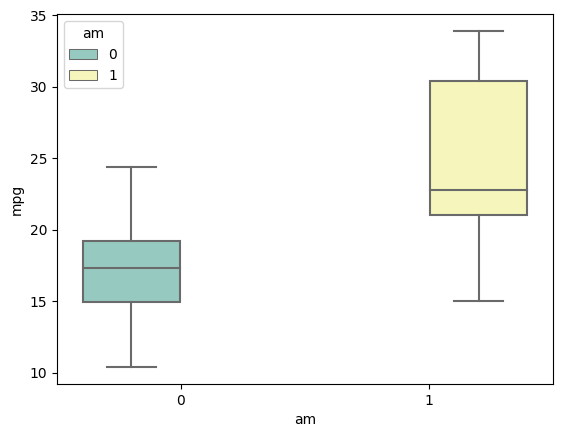

In [12]:
import seaborn as sns
sns.boxplot(x='am', y='mpg', hue='am', data = mtcars, palette = 'Set3')

- 정규성 검사 shaprio test 시행

In [13]:
# Checking the Normality of Data
# There are several methods to check whether our data is normally distributed. Here, we will use the Shapiro-Wilks test. Here’s how to examine if the data follow the normal distribution in Python:
from scipy import stats

am0 = mtcars.mpg[mtcars.am == 0]
am1 = mtcars.mpg[mtcars.am == 1]

am0mean = am0.mean()
am1mean = am1.mean()
#shapiro test p>0.05이면 정규성이 보장된다.
sha_a0, a0_pvalue = stats.shapiro(am0)
sha_a1, a1_pvalue = stats.shapiro(am1)

#정규성 검정
print("정규성검정 결과(Checking the Normality of Data) \n")
print(f'1. am == 0의 통계량: {sha_a0:.3f} \n am == 0의 p-value = {a0_pvalue:.3f}이다. \n')
print(f'2. am == 1의 통계량: {sha_a1:.3f} \n am == 1의 p-value = {a1_pvalue:.3f}이다. ')

정규성검정 결과(Checking the Normality of Data) 

1. am == 0의 통계량: 0.977 
 am == 0의 p-value = 0.899이다. 

2. am == 1의 통계량: 0.946 
 am == 1의 p-value = 0.536이다. 


- t-test

In [14]:
#stats

from scipy import stats

t, p = stats.ttest_ind(mtcars.mpg[mtcars.am == 0], mtcars.mpg[mtcars.am == 1], equal_var= False)

print("welch's t test Result\n ------------------------")
print("t-value =", round(t,2))

#p value
if p > 0.05:
    print("p-value =", round(p, 3),"통계적으로 유의하지 않았다. ")
else:
    print("p-value =", round(p, 3)," \n 으로 통계적으로 유의한 차이가 발생하였다.")

welch's t test Result
 ------------------------
t-value = -3.77
p-value = 0.001  
 으로 통계적으로 유의한 차이가 발생하였다.
